In [1]:
#Import everything
import os
import sys
import math
import numpy as np
import numpy.linalg
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import fcsparser

import os
import sys
import math
import numpy as np
import numpy.linalg
import pandas as pd

import ternary
from scipy.stats import multinomial

from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

import index_haps as idh
import index_flow as idf

C:\Users\z3283497\python\Annatina\MDS_amplicons\Code\index_flow.py:635: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_xscale('log')


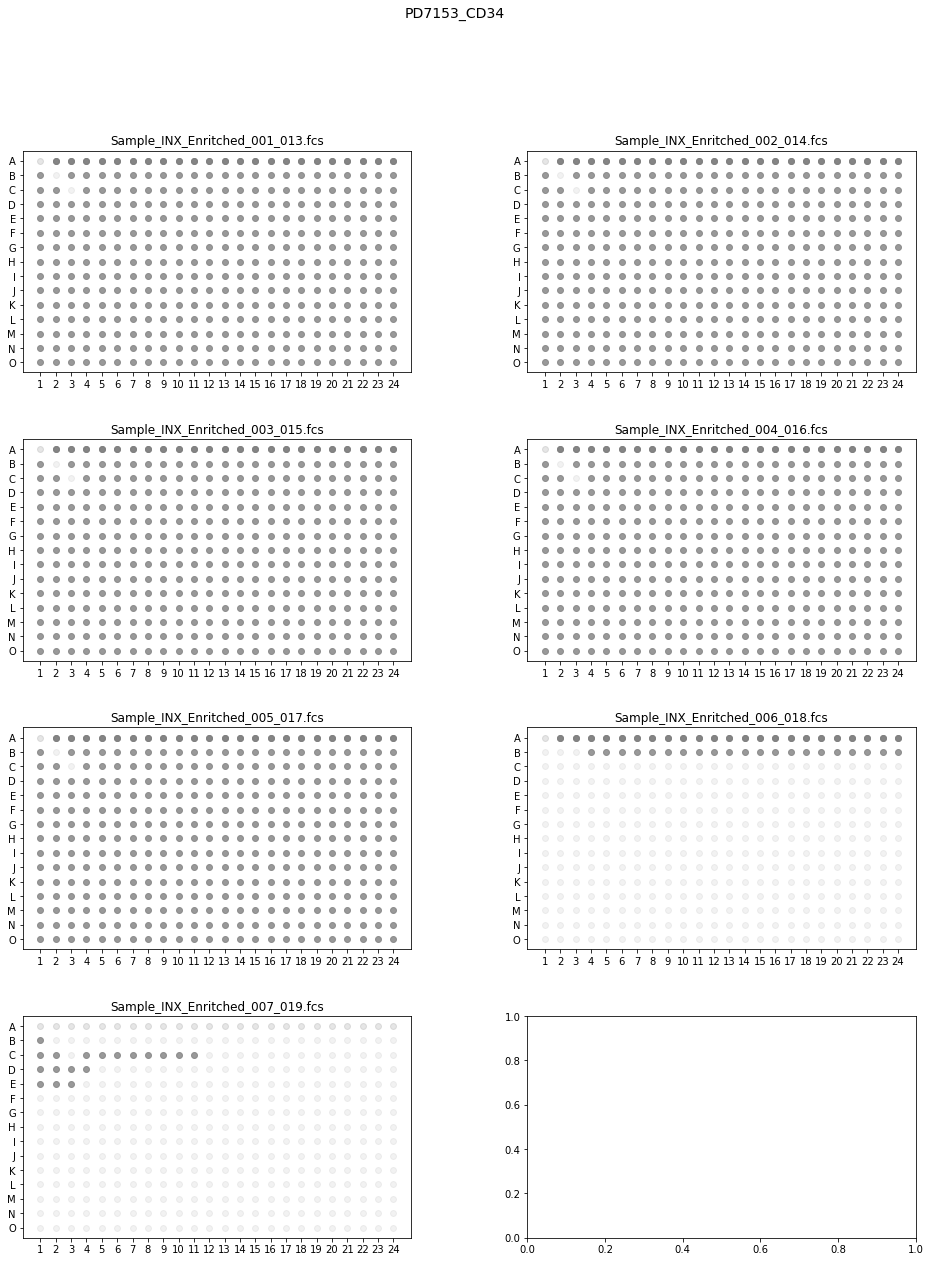

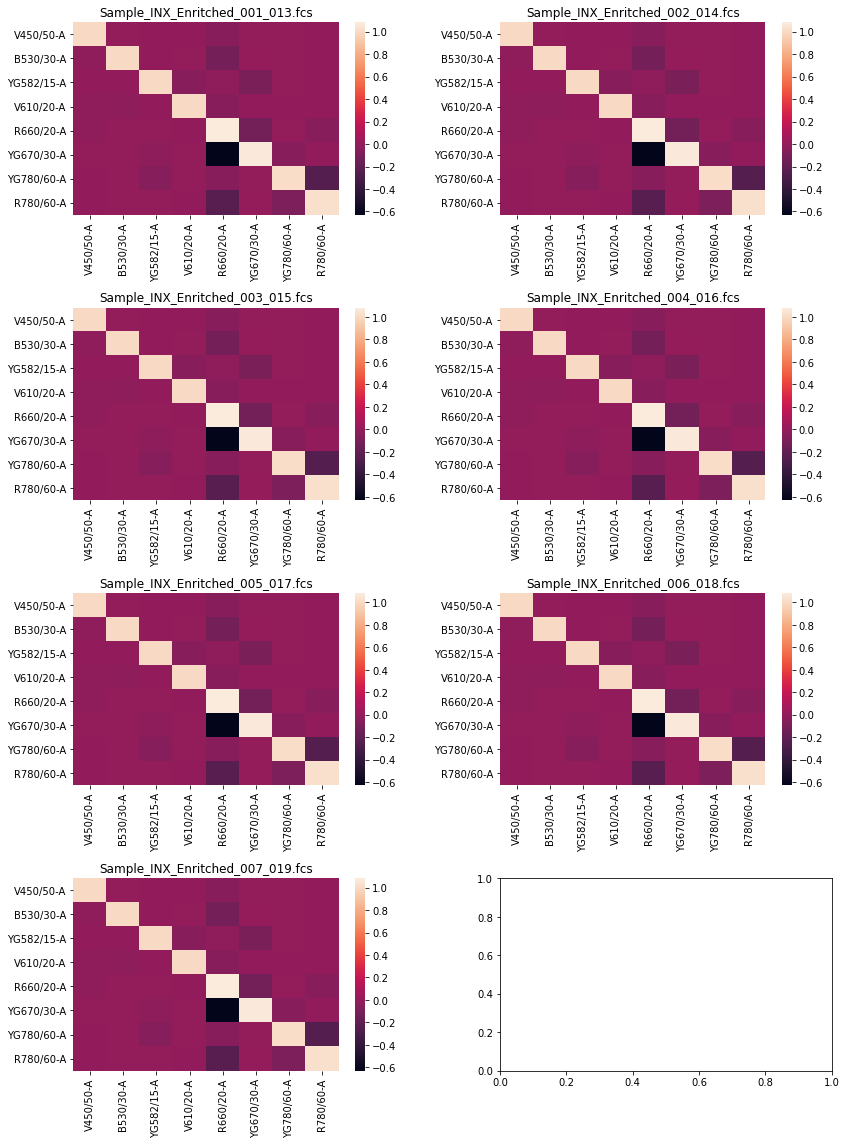

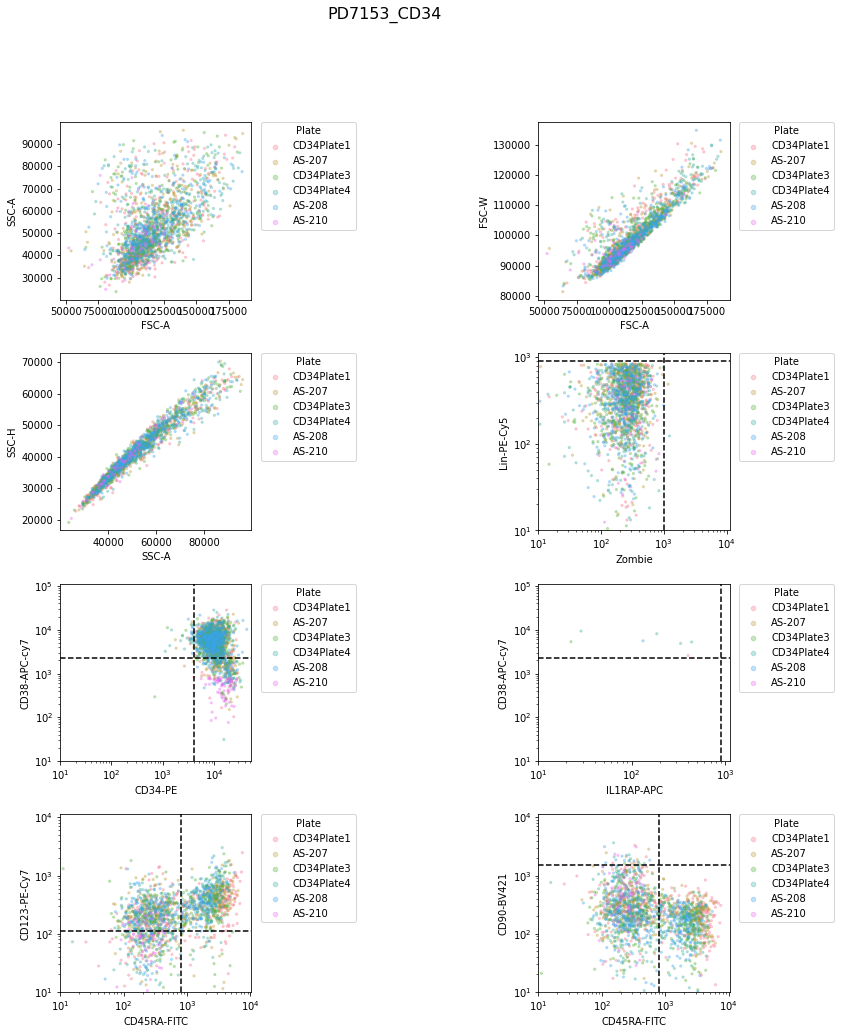

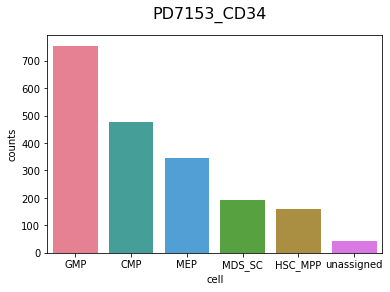

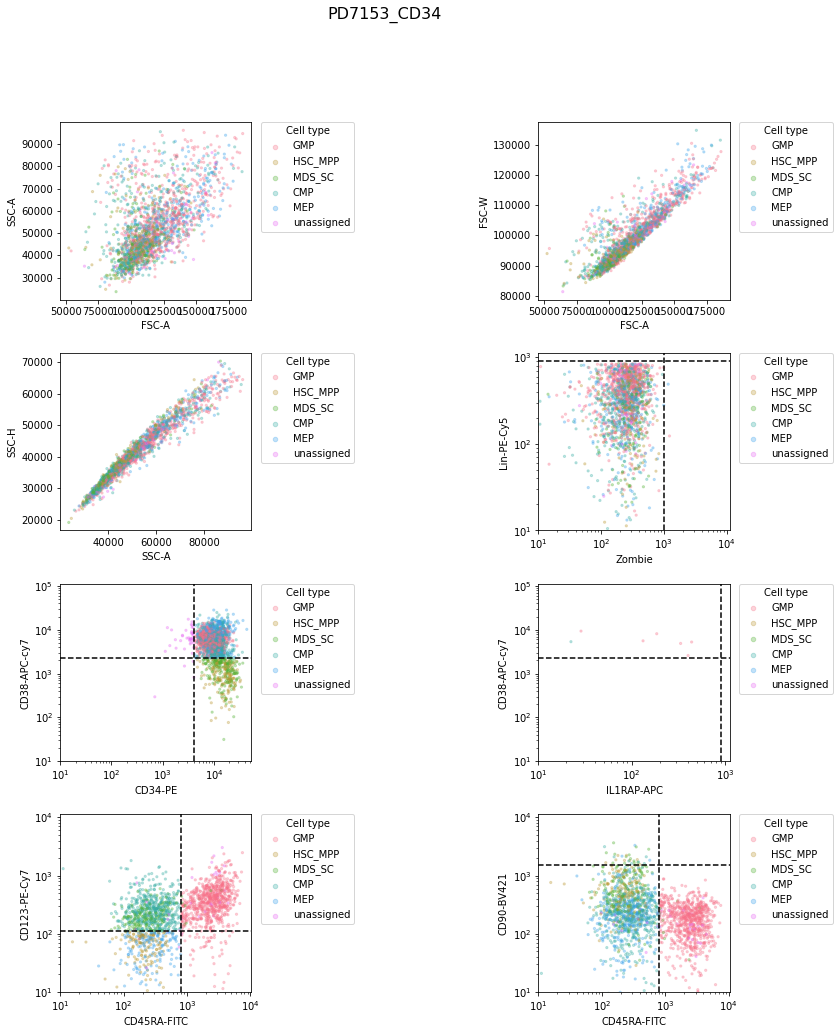

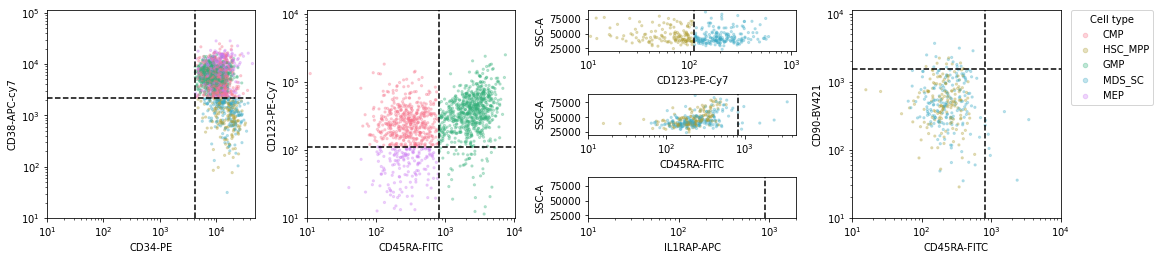

In [2]:
#PD7153 CD34 parameters

directory = '../Data/PD7153_BM/Indexed/'

#Make plate key - note one plate split over 2 index files
files = []
for filename in os.listdir(directory):
    files.append(filename)

plates = ['CD34Plate1', 'AS-207','CD34Plate3', 'CD34Plate4', 'AS-208', 'AS-210a', 'AS-210' ] #one plate splills over 2 files, rename later

plate_key = dict(zip(files, plates))

channel_key = {'YG582/15-A': 'CD34-PE', 
               'YG670/30-A': 'Lin-PE-Cy5', 
               'YG780/60-A': 'CD123-PE-Cy7', 
               'V450/50-A': 'CD90-BV421', 
               'V610/20-A': 'Zombie', 
               'B530/30-A': 'CD45RA-FITC', 
               'R660/20-A': 'IL1RAP-APC', 
               'R780/60-A': 'CD38-APC-cy7'
}

logs = ['Lin-PE-Cy5', 'CD34-PE','CD38-APC-cy7', 'CD45RA-FITC','CD123-PE-Cy7','Zombie', 'IL1RAP-APC', 'CD90-BV421' ]

plot_list = [
    ['FSC-A', 'SSC-A'],
    ['FSC-A', 'FSC-W'],
    ['SSC-A', 'SSC-H'],
    ['Zombie', 'Lin-PE-Cy5'], 
    ['CD34-PE', 'CD38-APC-cy7'],
    ['IL1RAP-APC', 'CD38-APC-cy7'],
    ['CD45RA-FITC', 'CD123-PE-Cy7'],
    ['CD45RA-FITC', 'CD90-BV421']
]
#Tweak for PD7153
gates = {
    'Lin-PE-Cy5': 900,
    'CD34-PE': 4100 ,
    'CD38-APC-cy7': 2200 ,  #2200 = 10% on Flowjo, 2900 = 15% , sort looks ~1000
    'CD45RA-FITC': 800 ,
    'CD123-PE-Cy7': 100,
    'Zombie': 1000,
    'IL1RAP-APC': 900,  #set from FlowJo looking at unstained, not convinced this worked
    'CD90-BV421': 1500
}

label = 'PD7153_CD34'
idf.plate_qc(directory, label)
source = idf.get_comp_data(directory, plate_key, channel_key, plot = True)
#Need to rename placeholder plate AS-210a, and reassign Plate_Well column
source['Plate'] = source['Plate'].replace({'AS-210a':'AS-210'})
source['Plate_Well'] = source['Plate'].astype(str) + '_' + source['Well'].astype(str)
idf.flowplot_byplate(source, plot_list, logs, gates, label)
CD34assigned = idf.MDS_BM_celltype_assign(source, gates, label, save = False)
idf.flowplot_bycelltype(CD34assigned, plot_list, logs, gates,  label, plot = True, save = False)
idf.flowplot_bycelltype_gating(CD34assigned, logs, gates,  label, plot = True, save = True)

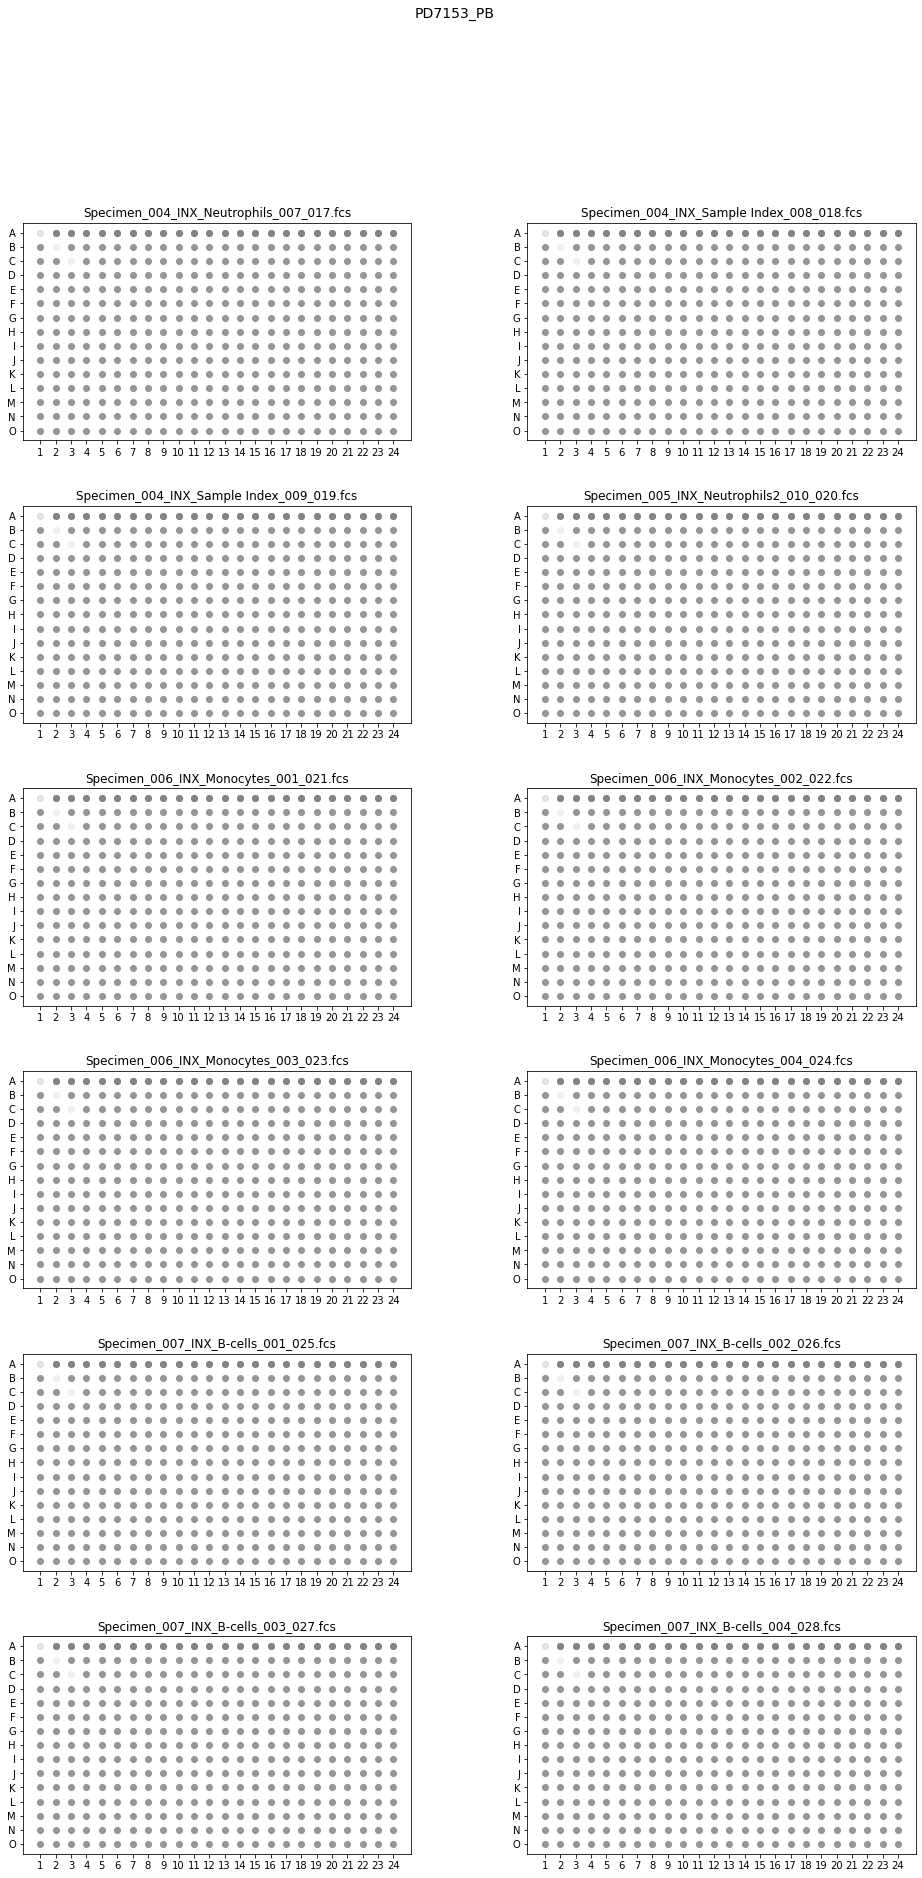

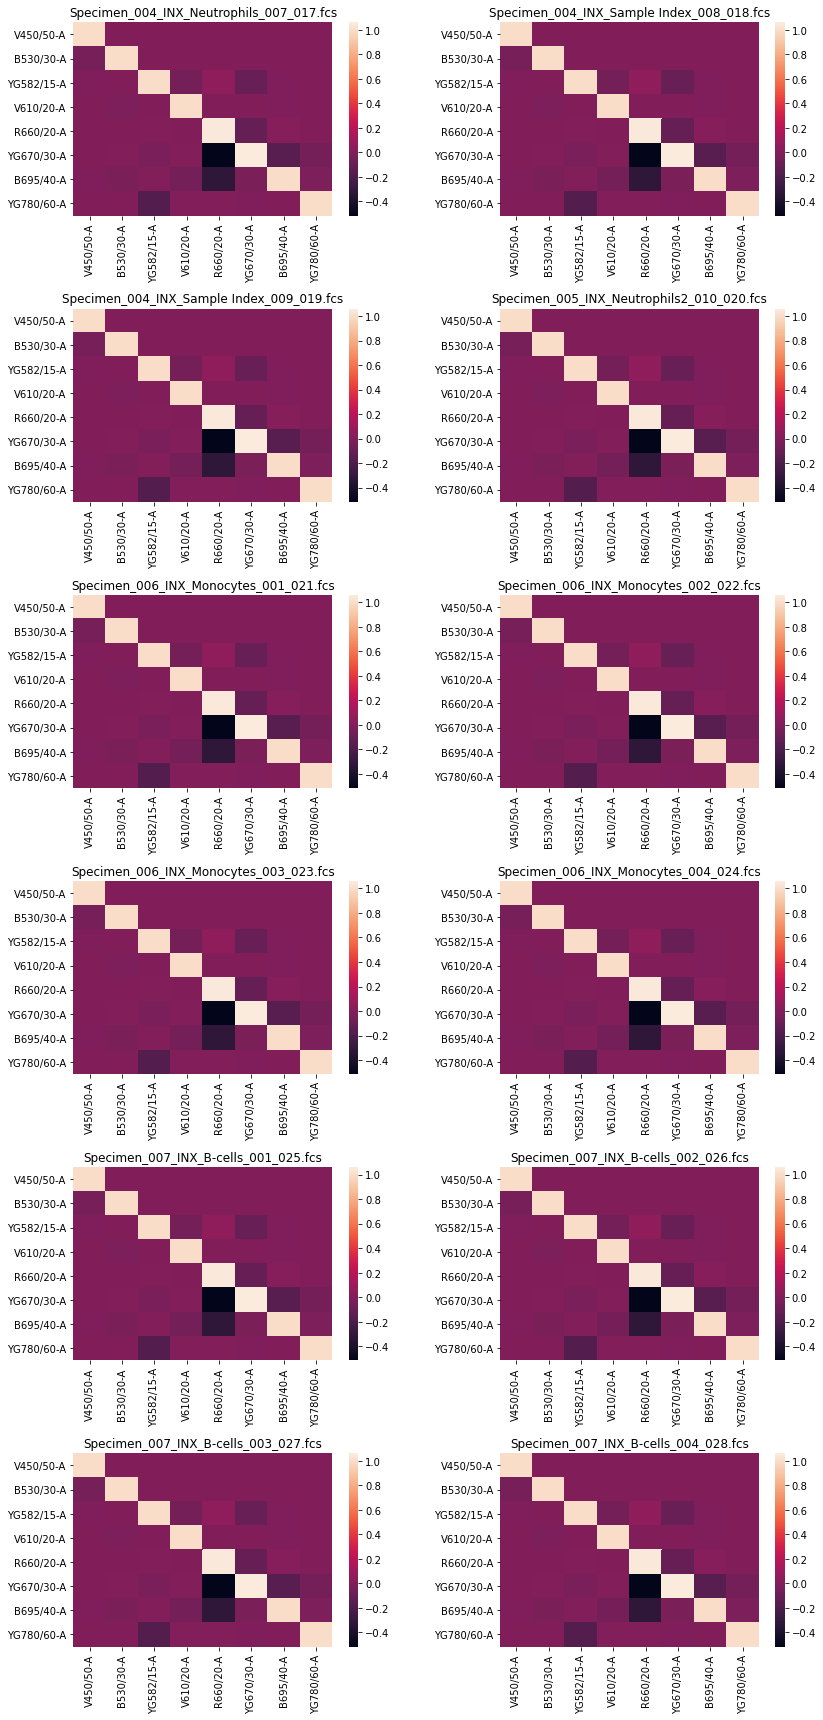

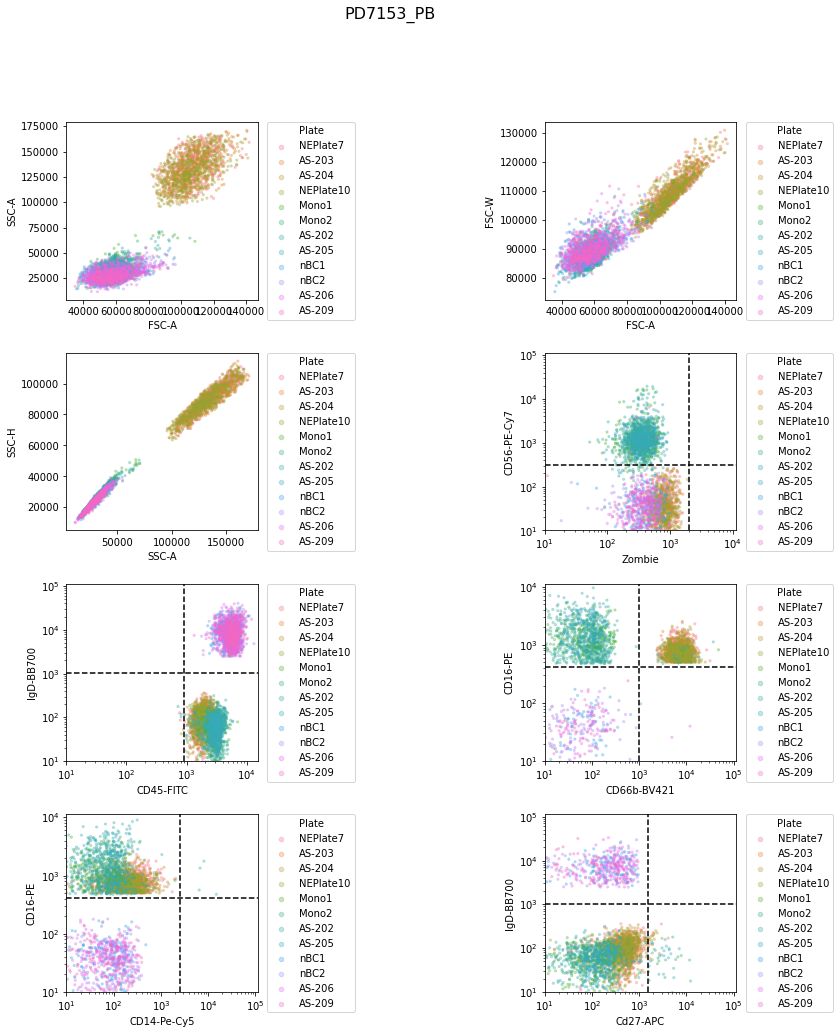

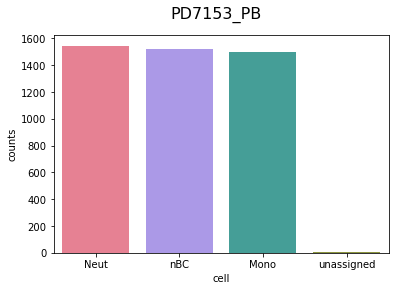

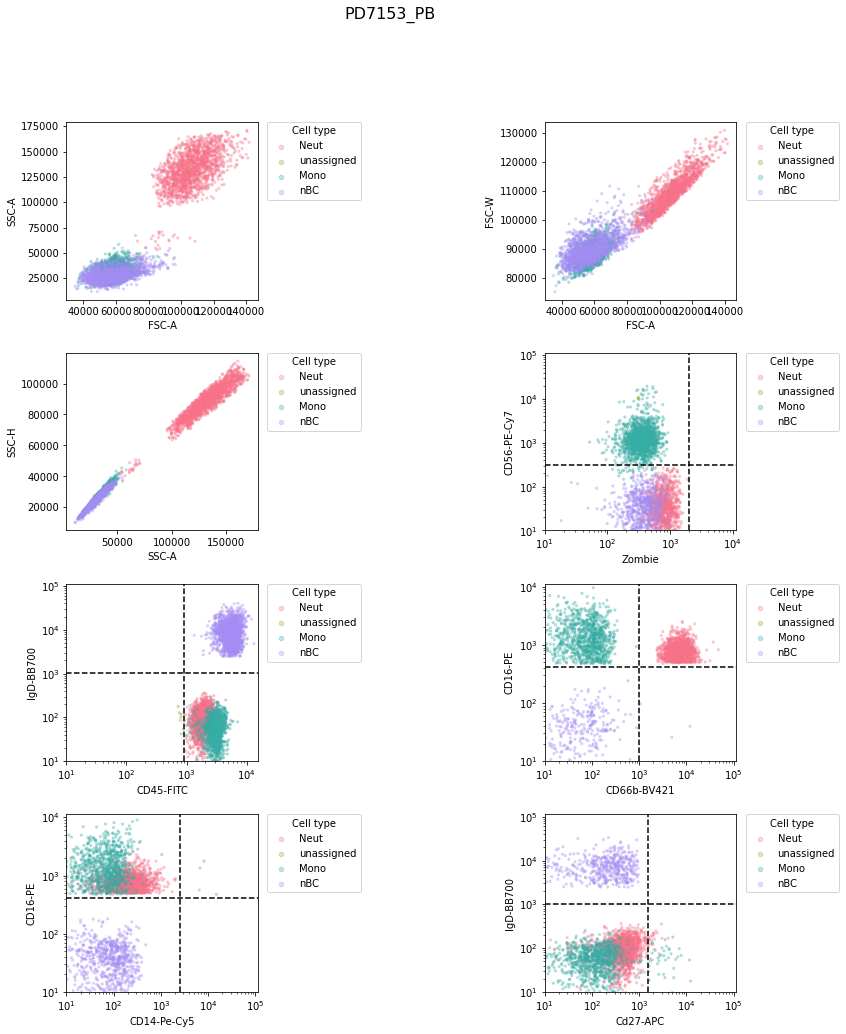

In [3]:
#PD7153 PB parameters

directory = '../Data/PD7153_PB/Indexed/'

#Make plate key
files = []
for filename in os.listdir(directory):
    files.append(filename)

plates = ['NEPlate7', 'AS-203','AS-204', 'NEPlate10', 'Mono1', 'Mono2', 'AS-202', 'AS-205', 'nBC1', 'nBC2' , 'AS-206', 'AS-209' ] #one plate splills over 2 files, rename later

plate_key = dict(zip(files, plates))

channel_key = {
    'YG582/15-A': 'CD16-PE', 
    'YG670/30-A': 'CD14-Pe-Cy5', 
    'YG780/60-A': 'CD56-PE-Cy7', 
    'V450/50-A': 'CD66b-BV421', 
    'V610/20-A': 'Zombie', 
    'B530/30-A': 'CD45-FITC', 
    'B695/40-A': 'IgD-BB700', 
    'R660/20-A': 'Cd27-APC'
}

logs = ['CD16-PE', 'CD14-Pe-Cy5', 'CD56-PE-Cy7', 'CD66b-BV421', 'Zombie', 'CD45-FITC', 'Cd27-APC', 'R780/60-A', 'IgD-BB700']

plot_list = [
    ['FSC-A', 'SSC-A'],
    ['FSC-A', 'FSC-W'],
    ['SSC-A', 'SSC-H'],
    ['Zombie', 'CD56-PE-Cy7'], 
    ['CD45-FITC', 'IgD-BB700'],
    ['CD66b-BV421', 'CD16-PE'],
    ['CD14-Pe-Cy5', 'CD16-PE'],
    ['Cd27-APC', 'IgD-BB700']
]

gates = {
    'CD16-PE': 400,
    'CD14-Pe-Cy5': 2500 ,
    'CD56-PE-Cy7': 300 ,
    'CD66b-BV421': 1000 ,
    'Zombie': 2000,
    'CD45-FITC': 900,
    'Cd27-APC': 1500,
    'IgD-BB700': 1000,
    'R780/60-A':1000
}
label = 'PD7153_PB'
idf.plate_qc(directory, label)
source = idf.get_comp_data(directory, plate_key, channel_key, plot = True)
idf.flowplot_byplate(source, plot_list, logs, gates,label)
PBassigned = idf.PB_celltype_assign(source, gates, label, save = False)
idf.flowplot_bycelltype(PBassigned, plot_list, logs, gates,  label, plot = True, save = False)

In [4]:
#Now combine everything into a single df that contains the celltype and flow data for each well
print('Number of CD34 wells (expect 1967) = ', len(CD34assigned))
print('Number of PB wells (expect 4572) = ',len(PBassigned))
PD7153_allcells_assigned = CD34assigned.append(PBassigned, ignore_index=True)
print('Total number of wells = ', len(PD7153_allcells_assigned))

Number of CD34 wells (expect 1967) =  1967
Number of PB wells (expect 4572) =  4572
Total number of wells =  6539


In [5]:
# import importlib
# importlib.reload(idh)

PD7153_4
Haplotypes being called on ['PD7153_SRSF2', 'PD7153_TET2a', 'PD7153_TET2b', 'PD7153_CUX1']
Cells with 10 reads for 4 genes =  1079
PD7153_4


C:\Users\z3283497\python\Annatina\MDS_amplicons\Code\index_haps.py:488: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(h_pad = 1)


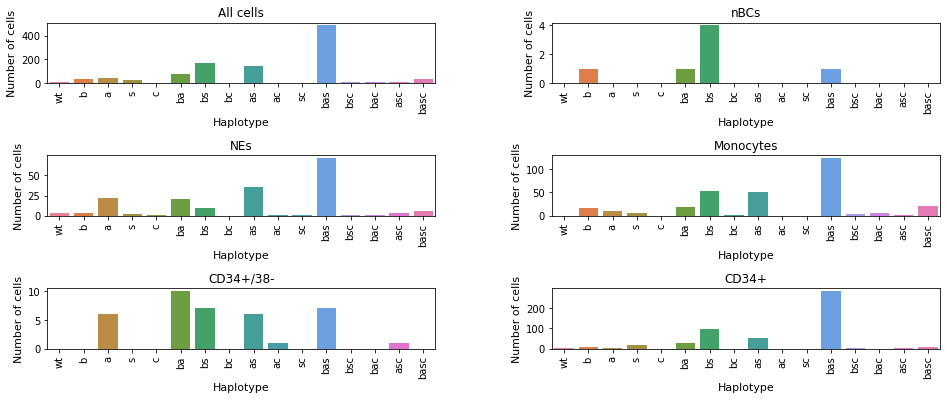

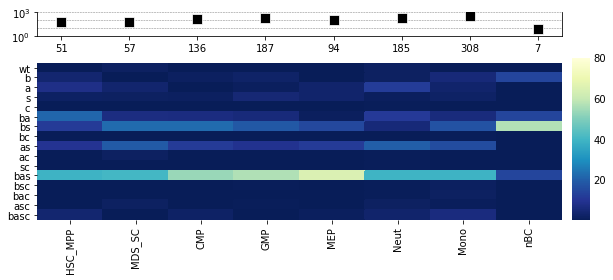

In [6]:
datafile = '../Data/Amp_data/clean_anon_allele_counts_resc_2.tsv'
metadata = '../Data/Amp_data/Amplicon_metadata_fixed_anon.xlsx'
pt_id = 'PD7153'
haps = 4
reads = 10
cutoff = 0.2
PD7153_plate = idh.data_retrieval2(datafile, metadata, pt_id)
PD7153_haps = idh.call_haps(PD7153_plate, metadata, pt_id, haps, reads, cutoff) #hap number, read cut, proportion mutated
PD7153_haps_indexed = pd.merge(PD7153_haps, PD7153_allcells_assigned, on = 'Plate_Well')
idh.plot_hap_dist_sort_type(PD7153_haps_indexed, pt_id, haps, reads, cutoff, save = True)
cell_number = idh.plot_index_heatmap_3(PD7153_haps_indexed, pt_id, haps, reads, cutoff, save = True)

In [7]:
#After dicsussion with AS and looking at historical data the mutation order we think is most likely is B, A, S

In [8]:
#Piecharts for figure 2
#Cell counts permitted haplotypes
cc = cell_number.loc[['BASC','bASC', 'bAsC', 'basC', 'basc']]
cc.insert(2, 'spacer', 'none')
cc

celltype,HSC_MPP,MDS_SC,spacer,CMP,GMP,MEP,Neut,Mono,nBC
Haplotype,,,,,,,,,
BASC,0,1,none,0,0,0,3,0,0
bASC,2,0,none,2,5,0,3,17,1
bAsC,6,13,none,31,35,14,10,53,4
basC,20,23,none,73,106,61,73,121,1
basc,2,0,none,3,0,1,6,20,0


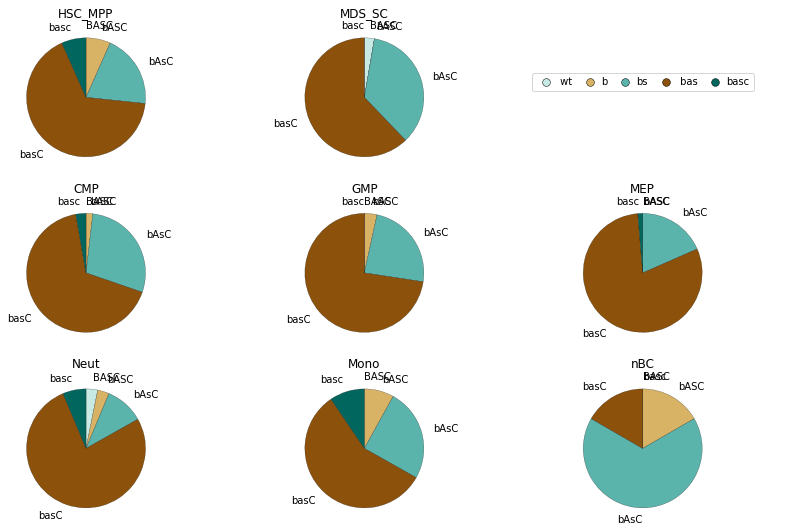

In [9]:
#Create proxy artists for legend
f,a = plt.subplots()
colors = ['#c7eae5', '#d8b365', '#5ab4ac', '#8c510a', '#01665e']
lgdlabels = [' wt', 'b', 'bs', ' bas', 'basc']
lgdhandles = []
for i, lab in enumerate(lgdlabels):
    line = a.scatter([0], [0], label=lab, color=colors[i], s = 60, edgecolor = 'black', linewidth = 0.5) 
    lgdhandles.append(line)
plt.close(f)

#Plot data
fig, ax = plt.subplots(3, 3, figsize = (12, 7.5))
ax = ax.flatten()

for count, ct in enumerate(cc.columns):
    if count == 2:
        continue
    else:
        labels = cc.index.to_list()
        sizes = cc[ct].to_list()
        wedgeprops={'edgecolor':'black','linewidth': 0.2,  'antialiased': True}
        ax[count].pie(sizes, labels = labels, colors = colors, counterclock=False, startangle = 90, wedgeprops = wedgeprops, labeldistance = 1.2)
        ax[count].set_title(ct)

ax[2].set_axis_off()    
ax[2].legend(handles = lgdhandles, labels = lgdlabels, loc = 'upper center',bbox_to_anchor = [0.5,0.7], ncol = 5, columnspacing = 0.8, handletextpad=0.1, markerscale = 1)

fig.tight_layout() 
fig.savefig(f'../Results/{pt_id}_permitted_piecharts.svg',bbox_inches='tight', dpi = 600)
fig.savefig(f'../Results/{pt_id}_permitted_piecharts.png',bbox_inches='tight', dpi = 600)

In [10]:
#Piecharts for figure 2
#Cell counts collapsed to cunts per total number of mutAtions
cc2 = cell_number.copy()

cc2['hap'] = cc2.index.get_level_values(0)

#count the number of lowercase in each haplotype
def n_lower_chars(string):
    return sum(1 for c in string if c.islower())

muts = []
haps = cc2['hap'].to_list()
for h in haps:
    muts.append(n_lower_chars(h))
mut_dict = dict(zip(haps, muts))    

cc2['muts'] = cc2['hap'].replace(mut_dict)
cc2 = cc2.groupby('muts').sum()
cc2.insert(2, 'spacer', 'none')

cc2

celltype,HSC_MPP,MDS_SC,spacer,CMP,GMP,MEP,Neut,Mono,nBC
muts,,,,,,,,,
0,0,1,none,0,0,0,3,0,0
1,7,3,none,4,16,6,28,34,1
2,22,29,none,56,63,26,70,122,5
3,20,24,none,73,108,61,78,132,1
4,2,0,none,3,0,1,6,20,0


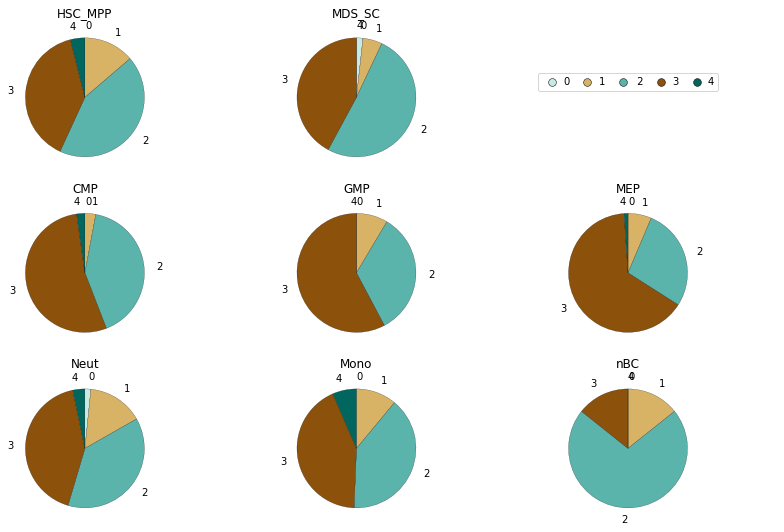

In [11]:
#Create proxy artists for legend
f,a = plt.subplots()
colors = ['#c7eae5', '#d8b365', '#5ab4ac', '#8c510a', '#01665e']
lgdlabels = ['0', '1', ' 2', '3', '4']
lgdhandles = []
for i, lab in enumerate(lgdlabels):
    line = a.scatter([0], [0], label=lab, color=colors[i], s = 60, edgecolor = 'black', linewidth = 0.5) 
    lgdhandles.append(line)
plt.close(f)

#Plot data
fig, ax = plt.subplots(3, 3, figsize = (12, 7.5))
ax = ax.flatten()

for count, ct in enumerate(cc2.columns):
    if count == 2:  #don't try to plot the spacer column
        continue
    else:
        labels = cc2.index.to_list()
        sizes = cc2[ct].to_list()
        wedgeprops={'edgecolor':'black','linewidth': 0.2,  'antialiased': True}
        ax[count].pie(sizes, labels = labels, colors = colors, counterclock=False, startangle = 90, wedgeprops = wedgeprops, labeldistance = 1.2)
        ax[count].set_title(ct)

ax[2].set_axis_off()    
ax[2].legend(handles = lgdhandles, labels = lgdlabels, loc = 'upper center',bbox_to_anchor = [0.5,0.7], ncol = 5, columnspacing = 0.8, handletextpad=0.1, markerscale = 1)

fig.tight_layout() 
fig.savefig(f'../Results/{pt_id}_mutno_piecharts.svg',bbox_inches='tight', dpi = 600)
fig.savefig(f'../Results/{pt_id}_mutno_piecharts.png',bbox_inches='tight', dpi = 600)


In [17]:
#Proportion of total cells which are wt
cc3 = cc2.copy()
cc3 = cc3.drop(columns = 'spacer')

In [18]:
#All cells sampled
wt = int(cc3.loc[:0].sum(axis = 1))
allcells = cc3.to_numpy().sum()
prop = wt / allcells
print('The total proportion of wt cells is ', prop)
print('The total number of cells with indx and haplotype data is ', allcells)

The total proportion of wt cells is  0.003902439024390244
The total number of cells with indx and haplotype data is  1025


In [19]:
#Stem cells
cc4 = cc3[['HSC_MPP', 'MDS_SC']]
wt = int(cc4.loc[:0].sum(axis = 1))
allcells = cc4.to_numpy().sum()
prop = wt / allcells
print('The total proportion of wt stem cells is ', prop)
print('The total number of stem cells with indx and haplotype data is ', allcells)

The total proportion of wt stem cells is  0.009259259259259259
The total number of stem cells with indx and haplotype data is  108


In [20]:
#HSCs
cc5 = cc3[['HSC_MPP']]
wt = int(cc5.loc[:0].sum(axis = 1))
allcells = cc5.to_numpy().sum()
prop = wt / allcells
print('The total proportion of wt HSCs is ', prop)
print('The total number of HSCs with indx and haplotype data is ', allcells)

The total proportion of wt HSCs is  0.0
The total number of HSCs with indx and haplotype data is  51


In [21]:
#Mature myeloid cells
cc6 = cc3[['Neut', 'Mono']]
wt = int(cc6.loc[:0].sum(axis = 1))
allcells = cc6.to_numpy().sum()
prop = wt / allcells
print('The total proportion of wt mature myeloid cells is ', prop)
print('The total number of mature myeloid cells with indx and haplotype data is ', allcells)

The total proportion of wt mature myeloid cells is  0.006085192697768763
The total number of mature myeloid cells with indx and haplotype data is  493
